### Dataset

<b> Context </b>
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

<b>Content</b>
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

### Explore & Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Data
df = pd.read_csv(f"../data/raw/Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option("display.max_columns",None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### Observations :

*  Expect SeniorCitizen, MonthlyCharges, TotalCharges all other columns as categorical varaible
*  we can utilize either binary encodeing or one-hot encoding.
*  Tree based algorithms might work well for this data

#### Binary Encoding

In [6]:
# Binary Encoding
binary_cols =[
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'
]

df[binary_cols] = df[binary_cols].replace({
        'Yes':1,
        'No':0,
        'Male':1,
        'Female':0
    })

C:\Users\lohit\AppData\Local\Temp\ipykernel_30504\552488142.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({


#### One Hot Encoding

In [7]:
# Multicategorical columns
multi_cat_col = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

# one-hot encode
df = pd.get_dummies(df,columns=multi_cat_col,drop_first=True)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


### Cleaning 

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [9]:
df = df.drop('customerID', axis=1)

In [10]:
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

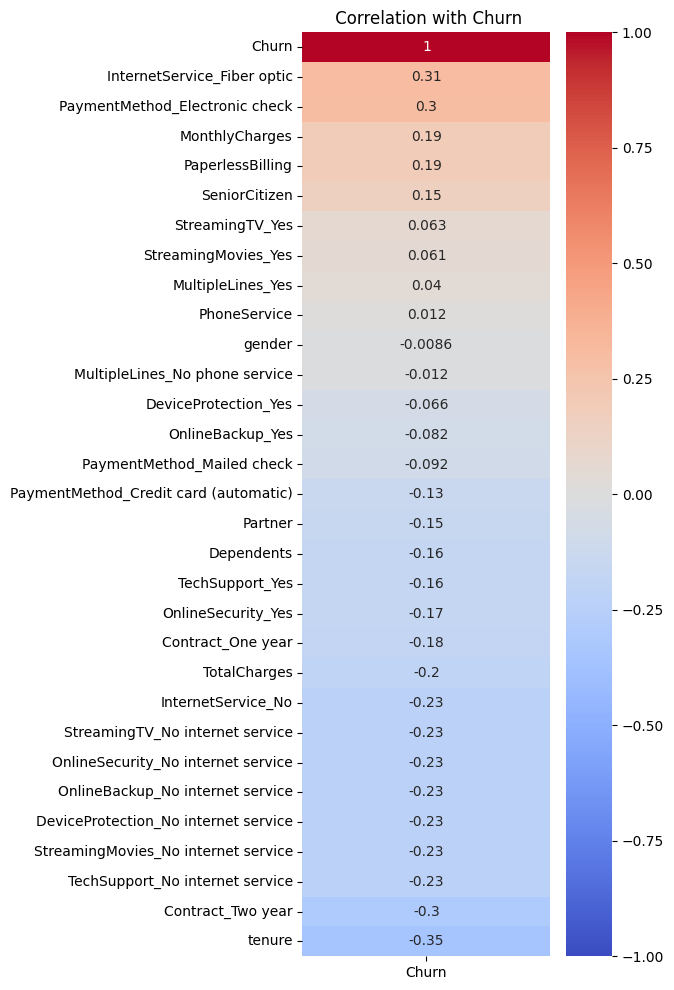

In [12]:
# Correclation Matrix 
corr_matrix = df.corr(numeric_only=True)

# Correletion with Churn 
churn_corr = corr_matrix[['Churn']].sort_values(by='Churn', ascending= False)

# plot Heatmap
plt.figure(figsize=(4,12))
sns.heatmap(churn_corr, annot=True,cmap='coolwarm', vmin = -1, vmax=1)
plt.title(" Correlation with Churn")
plt.show()

#### Observations :

#####  + ve Correlation 

*  Internet Service Via Fiber Optics high likly to churn possibility is due some network issue or expensive setup and maintenance
*  Electroninc  Check , Paperless Billing and other digital service are some positive correlations , we can infer well digital presense of these users have know manay options and some may offere cheaper prices they might be influence with marketing from other compitators.

##### - ve correlations 

* Contract_two and Contract_One  so less likely to churn - this show  as user group how welel planned  might not churn . may rolling out the some offers to first catogory user some promotion to convert them into long term contracts could be as a strategy


#### Multicolinearity 

In [13]:
# combine all the services in single column 
df['No_internet_service'] = (
    df['OnlineSecurity_No internet service'] |
    df['OnlineBackup_No internet service'] |
    df['DeviceProtection_No internet service'] |
    df['TechSupport_No internet service'] |
    df['StreamingTV_No internet service'] |
    df['StreamingMovies_No internet service']
).astype(int)

# Drop the columns redundent columns
drop_cols = [col for col in df.columns if 'No internet service' in col]
df = df.drop(columns=drop_cols)

# Handle PhoneService redundancy
if 'MultipleLines_No phone service' in df.columns:
    df['No_phone_service'] = df['MultipleLines_No phone service'].astype(int)
    df = df.drop(columns=['MultipleLines_No phone service'])

In [14]:
X = df.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

c:\Users\lohit\Desktop\WorkSpace\customer_churn_ml_end_to_end\.ml_clf_end_to_end\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  feature          VIF
11                     InternetService_No          inf
23                    No_internet_service          inf
5                            PhoneService  1773.528816
7                          MonthlyCharges   866.089640
10            InternetService_Fiber optic   148.500814
24                       No_phone_service    60.842267
17                    StreamingMovies_Yes    24.156394
16                        StreamingTV_Yes    24.080019
8                            TotalCharges    10.811490
4                                  tenure     7.584453
9                       MultipleLines_Yes     7.289761
14                   DeviceProtection_Yes     6.924754
13                       OnlineBackup_Yes     6.796678
15                        TechSupport_Yes     6.476508
12                     OnlineSecurity_Yes     6.338349
19                      Contract_Two year     2.652328
21         PaymentMethod_Electronic check     1.976032
22        

#### Observations 

* We have highly correlated columns  either we drop them or use some regulariation techniques like lasso or ridge if we are using linear regression or other linear model as they performance impact with multicolinearity problem.
* But Tree Based model will no be impact with this kind of problem

### MachineLearning

In [16]:
# Check data Imbalance
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

* we have imbance data set with 27 % churn and 63% Non churn data.

* we can tune parameter  based on assumption like if  business have expensive campaigns we might required to precison  and for cheap campigns we can with recal  or for fixed budget we need fintune base on f1 score

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

In [18]:
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.3 

#### RandomForest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',   # handles imbalance for you
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.886     0.770     0.824      1035
           1      0.532     0.725     0.614       374

    accuracy                          0.758      1409
   macro avg      0.709     0.747     0.719      1409
weighted avg      0.792     0.758     0.768      1409



In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.505   0.791   0.617   
0.3     0.532   0.725   0.614   
0.35    0.549   0.671   0.604   
0.4     0.573   0.620   0.596   
0.45    0.597   0.551   0.573   
0.5     0.624   0.492   0.550   


#### LightGBM Classifier

In [21]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Training timer
start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
⏱ Training time: 8.38 seconds
⏱ Prediction time: 0.0311 seconds
              precision    recall  f1-score   support

           0      0.914     0.702     0.795      1035
           1      0.498     0.818     0.619       374

    accuracy                          0.733      1409
   macro avg      0.706     0.760     0.707      1409
weighted avg      0.804     0.73

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for LightGBM
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.479   0.842   0.610   
0.3     0.498   0.818   0.619   
0.35    0.507   0.786   0.616   
0.4     0.524   0.757   0.619   
0.45    0.537   0.741   0.622   
0.5     0.552   0.701   0.617   


#### XGBoost Classifier

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.98 seconds
⏱ Prediction time: 0.0075 seconds
              precision    recall  f1-score   support

           0      0.917     0.690     0.787      1035
           1      0.490     0.826     0.616       374

    accuracy                          0.726      1409
   macro avg      0.704     0.758     0.701      1409
weighted avg      0.803     0.726     0.742      1409



In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.474   0.850   0.609   
0.3     0.490   0.826   0.616   
0.35    0.498   0.786   0.610   
0.4     0.514   0.757   0.612   
0.45    0.527   0.719   0.609   
0.5     0.547   0.690   0.610   


* ML Model choise XGBoost
* Gives a decent - same as LightGBM

### Hyperparameter Tuning & Experiment Tracking

In [25]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

In [26]:
# Objective Function For Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators",300,800),
        "learning_rate": trial.suggest_float("learning_rate",0.01,0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:,1]
    y_pred = (proba >= THRESHOLD).astype(int)
    return recall_score(y_test, y_pred, pos_label=1) # Optimize recall for churners

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=20)

print(" Best Params : ", study.best_params)
print(" Best Recall : ", study.best_value)

[I 2025-11-30 22:37:22,062] A new study created in memory with name: no-name-5759df17-0ce2-4e16-a403-de9488894a2d
[I 2025-11-30 22:37:24,573] Trial 0 finished with value: 0.9064171122994652 and parameters: {'n_estimators': 544, 'learning_rate': 0.17671433212924292, 'max_depth': 3, 'subsample': 0.9665030505877334, 'colsample_bytree': 0.5005974663238009, 'min_child_weight': 5, 'gamma': 1.793751356983833, 'reg_alpha': 1.375438885754992, 'reg_lambda': 4.035289402649564}. Best is trial 0 with value: 0.9064171122994652.
[I 2025-11-30 22:37:24,762] Trial 1 finished with value: 0.9064171122994652 and parameters: {'n_estimators': 422, 'learning_rate': 0.16885489843633872, 'max_depth': 4, 'subsample': 0.982493957997109, 'colsample_bytree': 0.5716942322819147, 'min_child_weight': 7, 'gamma': 1.8843640379467015, 'reg_alpha': 0.09089509984114119, 'reg_lambda': 0.09856674933841847}. Best is trial 0 with value: 0.9064171122994652.
[I 2025-11-30 22:37:25,028] Trial 2 finished with value: 0.89304812834

 Best Params :  {'n_estimators': 687, 'learning_rate': 0.10611155513984631, 'max_depth': 4, 'subsample': 0.9960381548120989, 'colsample_bytree': 0.7261590504878417, 'min_child_weight': 10, 'gamma': 3.289485984473608, 'reg_alpha': 3.6236916352789903, 'reg_lambda': 3.2237128835308457}
 Best Recall :  0.9224598930481284


In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Add the scale_pos_weight and fixed params to the best ones from Optuna
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

# Create model from best params
xgb = XGBClassifier(**best_params)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.95 seconds
⏱ Prediction time: 0.0097 seconds
              precision    recall  f1-score   support

           0      0.953     0.563     0.708      1035
           1      0.433     0.922     0.589       374

    accuracy                          0.659      1409
   macro avg      0.693     0.743     0.649      1409
weighted avg      0.815     0.659     0.676      1409



#### Tuning and Tracking with Mlflow

In [28]:
import mlflow
import mlflow.sklearn 
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import os

In [29]:
# Mlflow use the project folder
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
mlflow.set_tracking_uri("../mlruns")
mlflow.set_experiment("Telcom Churn - XGBoost")

with mlflow.start_run():
    # calculate scale_pos_weight
    scale_pos_weight = (y_train == 0).sum()/(y_train == 1).sum()

    # Best Params From optuna
    best_params = study.best_params
    best_params.update({
        "random_state" : 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })

    mlflow.log_params(best_params)

    # Training Time
    start_time = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train,y_train)
    train_time = time.time() - start_time
    mlflow.log_metric("train_time", train_time)

    # Prediction Time
    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:,1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time  = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)

    # Metrics
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test,proba)

    # log to mlflow
    mlflow.log_metric("precision",precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1",f1)
    mlflow.log_metric("roc_auc", auc)

    # Save Model
    mlflow.xgboost.log_model(xgb," model")
    print(classification_report(y_test, y_pred, digits=3))

c:\Users\lohit\Desktop\WorkSpace\customer_churn_ml_end_to_end\.ml_clf_end_to_end\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/11/30 22:37:57 INFO mlflow.tracking.fluent: Experiment with name 'Telcom Churn - XGBoost' does not exist. Creating a new experiment.
2025/11/30 22:38:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/30 22:38:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


              precision    recall  f1-score   support

           0      0.953     0.563     0.708      1035
           1      0.433     0.922     0.589       374

    accuracy                          0.659      1409
   macro avg      0.693     0.743     0.649      1409
weighted avg      0.815     0.659     0.676      1409



#### Observation

* Model we can capture the 92% churns  but with less preecision - if we have   expensive campaign  we need  tune some sort of balance metric like F1 score.